In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
plt.rcParams["figure.figsize"] = (20,10)

In [3]:
df = pd.read_csv('TSLA.csv')

sma = df.rolling(window = 20).mean()
rstd = df.rolling(window = 20).std()

upper_band = sma + 2 * rstd
lower_band = sma - 2 * rstd

df['BB_Upper'] = upper_band['Adj Close']
df['BB_Lower'] = lower_band['Adj Close']

df

,Date,Open,High,Low,Close,Adj Close,Volume,BB_Upper,BB_Lower
0,2020-07-23,335.790009,337.799988,296.153992,302.614014,302.614014,121642500,NaN,NaN
1,2020-07-24,283.201996,293.000000,273.308014,283.399994,283.399994,96983000,NaN,NaN
2,2020-07-27,287.000000,309.588013,282.600006,307.920013,307.920013,80243500,NaN,NaN
3,2020-07-28,300.799988,312.940002,294.884003,295.298004,295.298004,79043500,NaN,NaN
4,2020-07-29,300.200012,306.962006,297.399994,299.821991,299.821991,47134500,NaN,NaN
...,...,...,...,...,...,...,...,...,...
247,2021-07-16,654.679993,656.700012,642.200012,644.219971,644.219971,16339800,702.170528,617.683476
248,2021-07-19,629.890015,647.200012,621.289978,646.219971,646.219971,21297100,700.267782,621.877219
249,2021-07-20,651.989990,662.390015,640.500000,660.500000,660.500000,15487100,697.390171,628.721828
250,2021-07-21,659.609985,664.859985,650.289978,655.289978,655.289978,13953300,693.877390,635.392605


<function matplotlib.pyplot.show(close=None, block=None)>

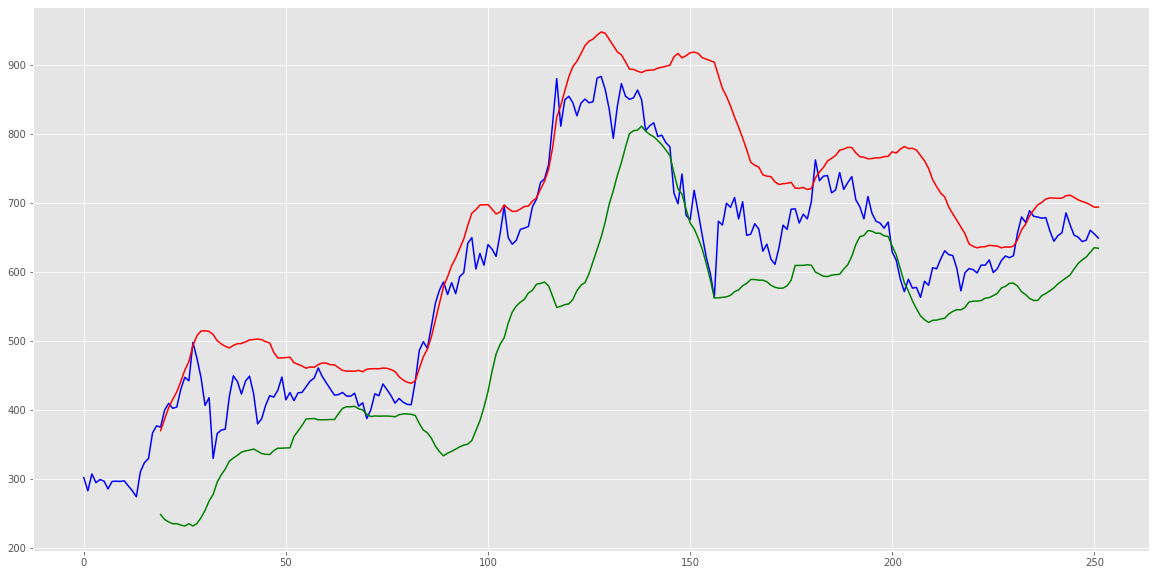

In [4]:
plt.plot(df['Adj Close'], color = 'blue')
plt.plot(df['BB_Upper'], color = 'red')
plt.plot(df['BB_Lower'] , color = 'green')
plt.show

In [5]:
#Function to make MACD lines and signal lines
def MACDlines(df1,a1,a2):
    
    df = df1
    
    df['12 day EMA'] = df['Close'].ewm(span=a1).mean()
    df['26 day EMA'] = df['Close'].ewm(span=a2).mean()
    #MACD line definition
    df['MACD line'] = df['12 day EMA'] - df['26 day EMA']
    #Signal line calculation
    df['Signal Line'] = df['MACD line'].ewm(span=9).mean()
    
    return df

df2 = MACDlines(df,12,26)
df2.head()

,Date,Open,High,Low,Close,Adj Close,Volume,BB_Upper,BB_Lower,12 day EMA,26 day EMA,MACD line,Signal Line
0,2020-07-23,335.790009,337.799988,296.153992,302.614014,302.614014,121642500,NaN,NaN,302.614014,302.614014,0.000000,0.000000
1,2020-07-24,283.201996,293.000000,273.308014,283.399994,283.399994,96983000,NaN,NaN,292.206420,292.637504,-0.431084,-0.239491
2,2020-07-27,287.000000,309.588013,282.600006,307.920013,307.920013,80243500,NaN,NaN,298.339439,298.128361,0.211078,-0.054832
3,2020-07-28,300.799988,312.940002,294.884003,295.298004,295.298004,79043500,NaN,NaN,297.379377,297.337117,0.042260,-0.021941
4,2020-07-29,300.200012,306.962006,297.399994,299.821991,299.821991,47134500,NaN,NaN,298.043026,297.913369,0.129657,0.023156


<function matplotlib.pyplot.show(close=None, block=None)>

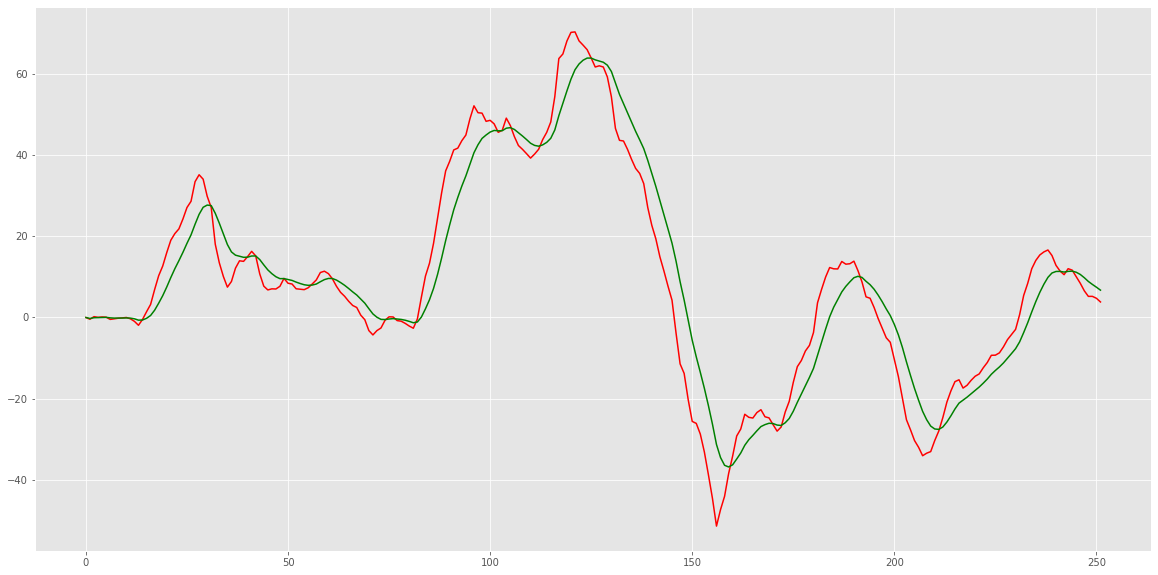

In [6]:
plt.plot(df2['MACD line'] , color = 'red')
plt.plot(df2['Signal Line'] , color = 'green')
plt.show

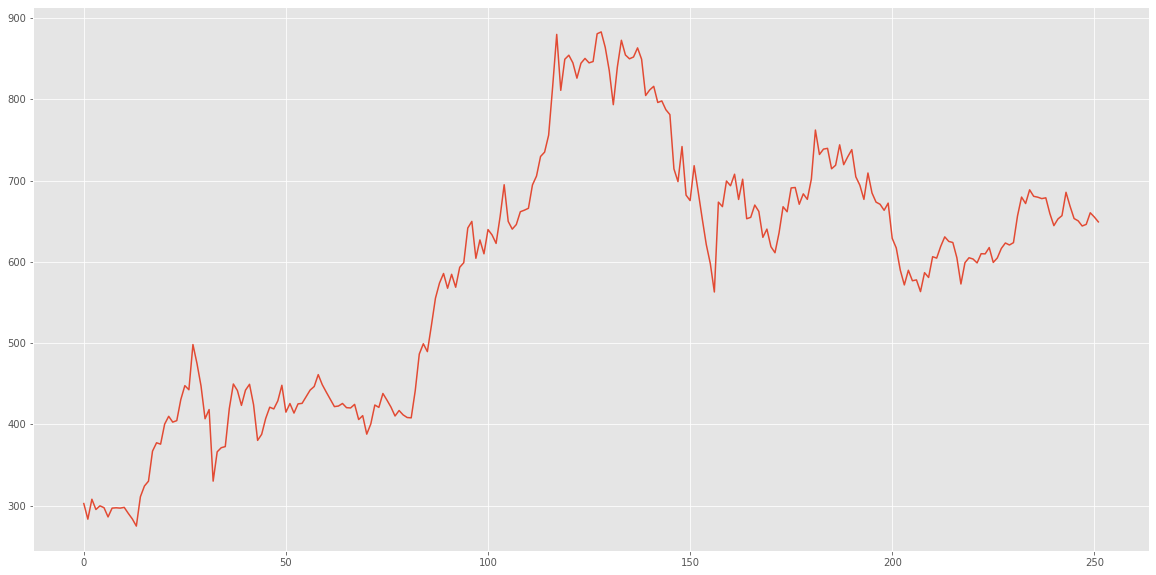

In [7]:
plt.plot(df2['Close'])

In [ ]:
import talib

df['RSI'] = talib.RSI(df['Adj Close'], 14)
df